# Brouillage d'un doublet de longueurs d'ondes en lame d'air

In [379]:
# librairies pour l'interaction
%matplotlib notebook
from ipywidgets import interact, FloatSlider, IntSlider, Layout
import ipywidgets as widgets

In [380]:
# librairies scientifiques usuelles
from scipy.signal import gausspulse
from scipy import fftpack
# graphiques
import matplotlib.pyplot as plt
from numpy import pi, exp, linspace, cos, meshgrid, sinc, sqrt
from matplotlib.colors import LinearSegmentedColormap

On étudie un interféromètre de Michelson réglé en lame d'air par un doublet de longueurs d'onde $\lambda_1$ et $\lambda_2$ (voir le cours).

In [381]:
e = 10 # nm
# Le doublet jaune du sodium
lambda1 = 589.0 #nm
lambda2 = 589.6 #nm
I0 = 1
f = 1 # m

L'expression de la différence de marche permet de calculer l'intensité en un point donné :

In [382]:
def I(x, y, Lambda, e):
    delta = 2*e*1e-9*f/sqrt(x**2+y**2+f**2)  # 2 e cos(i)
    return 2*I0*(1+cos(2*pi*delta/(Lambda*1e-9)))

Le code ci-dessous affiche la figure d'interférences et permet de modifier les valeurs de $e$, $\lambda_1$ et $\lambda_2$.

<IPython.core.display.Javascript object>


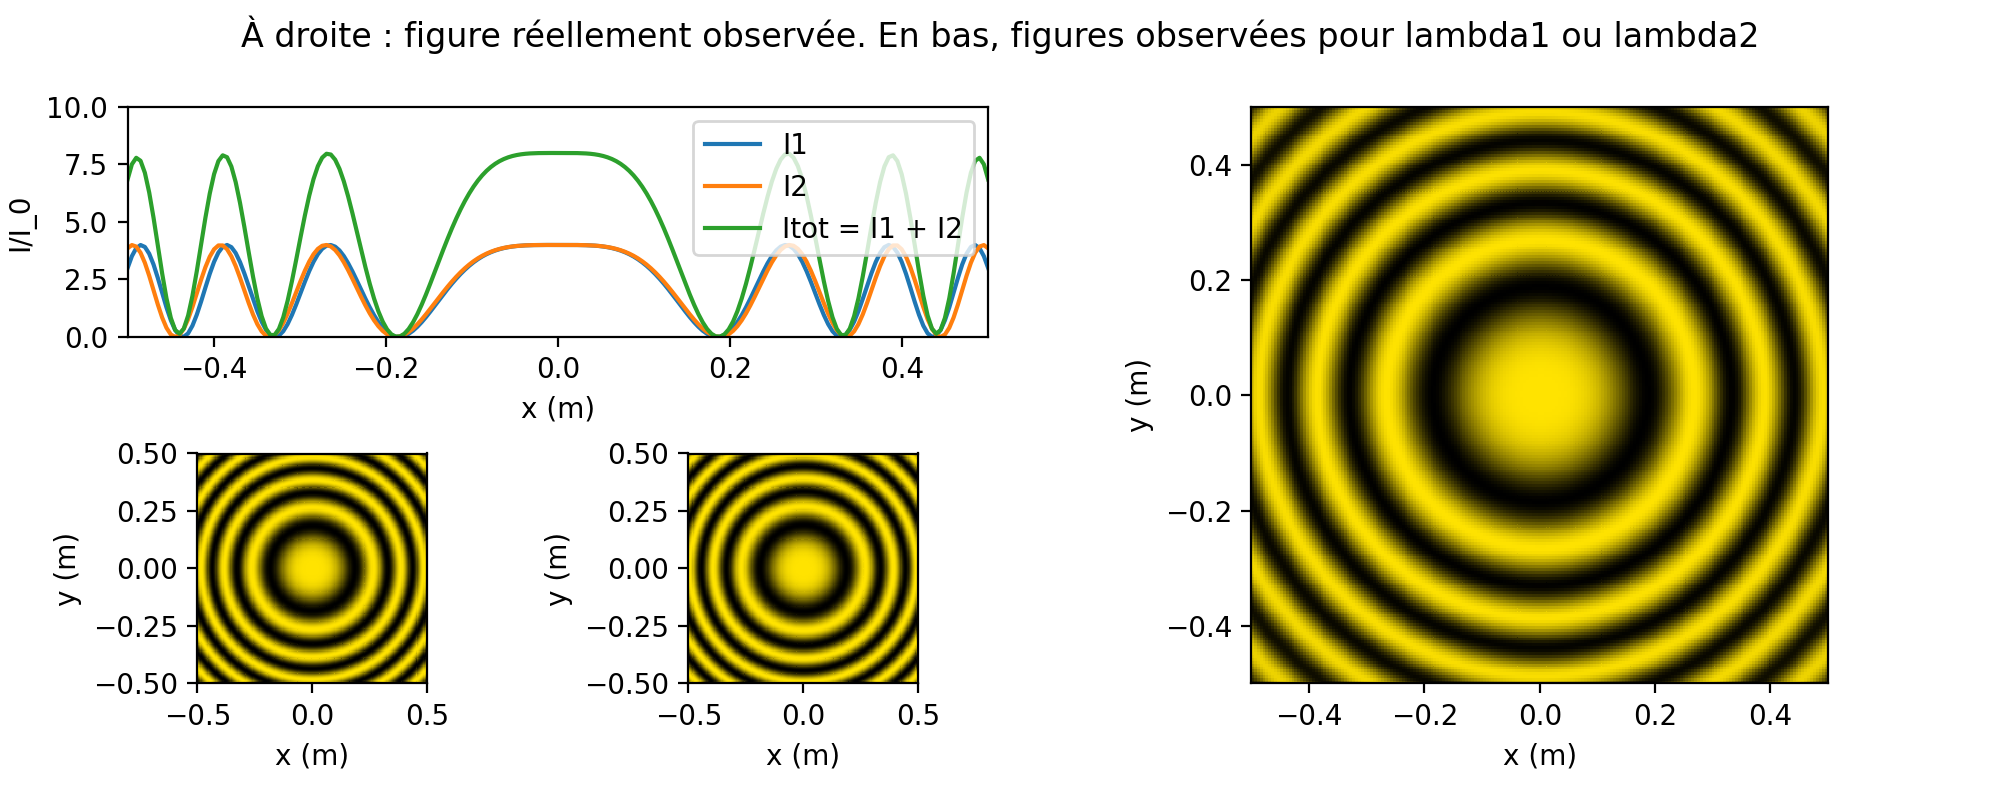

interactive(children=(FloatSlider(value=580.0, description='lambda1 (nm)', layout=Layout(width='100%'), max=70…

<function __main__.update_lambda(lambda1=580, lambda2=600, e=1e-08)>

In [383]:
# Tracé du graphique

# paramètres d'affichage
xmax = .5
npoints = 200

# Couleur jaune sodium
cmap1 = LinearSegmentedColormap.from_list(
    "my_colormap", ((0, 0, 0), (1, .89, 0)), N=400, gamma=1.0)


fig = plt.figure("Brouillage de la figure d'interférences avec 2 sources", figsize=(10, 4))

# Tracé des courbes d'intensité

ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=2)

x1 = linspace(-xmax, xmax, npoints)
l_S1, = plt.plot(x1, I(x1, 0, lambda1, e), label='I1')
l_S2, = plt.plot(x1, I(x1, 0, lambda2, e), label='I2')
l_tot, = plt.plot(x1, I(x1, 0, lambda1, e) + I(x1, 0, lambda2, e), label='Itot = I1 + I2')

plt.xlabel('x (m)')
plt.ylabel('I/I_0')
plt.legend(loc=1)
plt.xlim([-xmax, xmax])
plt.ylim([0, 10])


# Tracé de la figure d'interférences complète
ax2 = plt.subplot2grid((2, 4), (0, 2), colspan=2, rowspan=2)
ax2.set_aspect('equal')

y, x = meshgrid(linspace(-xmax, xmax, npoints), linspace(-xmax, xmax, npoints))
z = I(x, y, lambda1, e) + I(x, y, lambda2, e)
z = z[:-1, :-1]
figure_complete = plt.pcolormesh(x, y, z, vmin=0, vmax=8*I0, cmap=cmap1)

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.xlim([-xmax, xmax])
plt.ylim([-xmax, xmax])


# Tracé de la figure d'interférences pour lambda1
ax3 = plt.subplot2grid((2, 4), (1, 0))
ax3.set_aspect('equal')

y, x = meshgrid(linspace(-xmax, xmax, npoints), linspace(-xmax, xmax, npoints))
z = I(x, y, lambda1, e)
z = z[:-1, :-1]
figure_1 = plt.pcolormesh(x, y, z, vmin=0, vmax=4*I0, cmap=cmap1)

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.xlim([-xmax, xmax])
plt.ylim([-xmax, xmax])

# Tracé de la figure d'interférences pour lambda2
ax4 = plt.subplot2grid((2, 4), (1, 1))
ax4.set_aspect('equal')

y, x = meshgrid(linspace(-xmax, xmax, npoints), linspace(-xmax, xmax, npoints))
z = I(x, y, lambda2, e)
z = z[:-1, :-1]
figure_2 = plt.pcolormesh(x, y, z, vmin=0, vmax=4*I0, cmap=cmap1)

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.xlim([-xmax, xmax])
plt.ylim([-xmax, xmax])



# Gestion des mises à jour lorsqu'on déplace le curseur

lambdamin = 570
lambdamax = 700
lambdastep = 10

plt.suptitle('À droite : figure réellement observée. En bas, figures observées pour lambda1 ou lambda2')
plt.tight_layout()

lambda1_widget = FloatSlider(min=lambdamin, max=lambdamax, value=580, step=lambdastep,
                         layout=Layout(width='100%'), description='lambda1 (nm)',  readout_format='.1f')

lambda2_widget = FloatSlider(min=lambdamin, max=lambdamax, value=600, step=lambdastep,
                         layout=Layout(width='100%'), description='lambda2 (nm)',  readout_format='.1f')

e_widget = FloatSlider(min=5000, max=15000, value=8700, step=10,
                         layout=Layout(width='100%'), description='e (nm)',  readout_format='4.1f')


def update_lambda(lambda1=580, lambda2=600, e=1e-8):
    """Met à jour le graphique lorsqu'on déplace le curseur"""
    z1 = I(x, y, lambda1, e)
    z1 = z1[:-1, :-1]
    z2 = I(x, y, lambda2, e)
    z2 = z2[:-1, :-1]
    l_S1.set_data([x1, I(x1, 0, lambda1, e)])
    l_S2.set_data([x1, I(x1, 0, lambda2, e)])
    l_tot.set_data([x1, I(x1, 0, lambda1, e) + I(x1, 0, lambda2, e)])
    #ax1.set_xlim([-xlim, xlim])
    #ax2.set_xlim([-xlim, xlim])
    figure_complete.set_array((z1+z2).ravel())
    figure_1.set_array(z1.ravel())
    figure_2.set_array(z2.ravel())

    plt.draw()


interact(update_lambda, lambda1=lambda1_widget, lambda2=lambda2_widget, e=e_widget)